# Reconstruction Engines
**Learning more about the different engines and their parameters.**

PtyPy offers a range of different reconstruction engines that can be grouped into the 3 main categories of

- Projectional engines (DM, RAAR)
- Stochastic engines (ePIE, SDR)
- Gradient-based engines (ML)

These engine groups share similar sets of parameters. In this example, we pick one from each category and look at some of their parameters.

## Difference Map (DM) algorithm
In PtyPy we have implemented a generalised version of the difference map algorithm with the following update for the exit wave $\Psi$ of every view

$$
\Psi_{j+1} = \{\alpha (\mathbb{I} - \mathcal{O}) + \mathcal{F} [(1 + \alpha) \mathcal{O} - \alpha \mathbb{I}]\}(\Psi_{j})
$$

where $\mathcal{O}$ and $\mathcal{F}$ are the overlap and Fourier update, respectively. $\mathbb{I}$ is the idenity matrix and $\alpha$ is a tuning parameter that blends pure alternating projections ($\alpha=0$) with the original DM algorithm ($\alpha=1$). By its very nature, $\alpha=1$ is more exploratory but can be a bit too "aggressive" in some cases, whereas $\alpha=0$ has a tendency to get stuck in local minima. In practice, $\alpha=0.95$ seems to be a good and robust compromise. In our moonflower example, we can adjust the `alpha` parameter accordingly

```python
p.engines.engine00 = u.Param()
p.engines.engine00.name = "DM"
p.engines.engine00.numiter = 80
p.engines.engine00.alpha = 0.95

```

<div class="alert alert-danger" markdown="1">
<strong>TODO</strong><br>Overlap update, Fourier update including parameters <code>probe_update_start</code>, <code>update_object_first</code>, <code>overlap_converge_factor</code>, <code>overlap_max_iterations</code> and <code>fourier_power_pound</code>.
</div>

<div class="alert alert-warning" markdown="1">
    <strong>Exersice</strong><br>Modify different DM engine parameters and observe their impact on the outcome of the reconstruction.
</div>

---

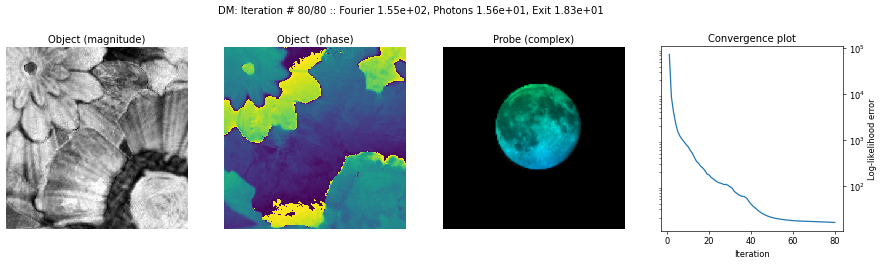


==== This reconstruction relied on the following work ==========================
The Ptypy framework:
    Enders B. and Thibault P., "A computational framework for ptychographic reconstructions" Proc. Royal Soc. A 472 (2016) 20160640, doi: 10.1098/rspa.2016.0640.
The difference map reconstruction algorithm:
    Thibault et al., "Probe retrieval in ptychographic coherent diffractive imaging" Ultramicroscopy 109 (2009) 338, doi: 10.1016/j.ultramic.2008.12.011.


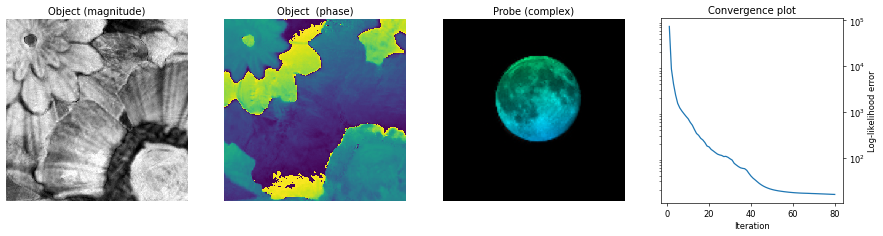

In [1]:
import ptypy
import ptypy.utils as u

p = u.Param()
p.verbose_level = "interactive"
p.io = u.Param()
p.io.rfile = None
p.io.autosave = u.Param(active=False)
p.io.autoplot = u.Param(active=False)
p.io.interaction = u.Param(active=False)
p.io.jupyter_autoplot = u.Param(active=True)

p.scans = u.Param()
p.scans.MF = u.Param()
p.scans.MF.name = "Full"
p.scans.MF.data= u.Param()
p.scans.MF.data.name = "MoonFlowerScan"
p.scans.MF.data.shape = 128
p.scans.MF.data.num_frames = 200
p.scans.MF.data.save = None
p.scans.MF.data.density = 0.2
p.scans.MF.data.photons = 1e8
p.scans.MF.data.psf = 0.

# Define reconstruction engines
p.engines = u.Param()

# Difference Map (DM) engine
p.engines.engine00 = u.Param()
p.engines.engine00.name = "DM"
p.engines.engine00.numiter = 80

# General update
p.engines.engine00.alpha = 0.95

# Overlap update
p.engines.engine00.overlap_converge_factor = 0.05
p.engines.engine00.overlap_max_iterations = 10
p.engines.engine00.update_object_first = True
p.engines.engine00.probe_update_start = 2

# Fourier update
p.engines.engine00.fourier_power_bound = 0.25

P = ptypy.core.Ptycho(p,level=5)

## ePIE algorithm

The exit wave update in standard ePIE is basically like alternating projects in that

$$
\Psi_{j+1} = \mathcal{F} (\mathcal{O}(\Psi_{j}))
$$

where $\mathcal{O}$ and $\mathcal{F}$ are again the overlap and Fourier update, respectively. In contrast to projectional methods ePIE is following a stochastic approach where the exit wave is updated sequentially for randomly selected views. In each of these randomized steps as part of the overlap update, the probe $P_{j}$ and object $O_{j}$ are modified like this 

$$
O_{j+1} = O_{j} + \alpha \cdot P_{j}^{*} \cdot [\Psi_{\prime} - \Psi_{j+1}] / ||P_{j}||_{max}^2
$$ 

$$
P_{j+1} = P_{j} + \beta \cdot O_{j+1}^{*} \cdot [\Psi_{\prime} - \Psi_{j+1}] / ||O_{j}||_{max}^2
$$ 

where $\Psi_{\prime} = \mathcal{O}(\Psi_{j}) = P_{j} \cdot O_{j}$ is the exit wave from the previously updated view, $^{*}$ is the complex conjugate and $||\cdot||_{max}$ is the maximum norm. The parameters $\alpha$ and $\beta$ control the strength of object and probe update, respectively and are both equal to $1$ by default. Lowering $\alpha$ or $\beta$ will lower the impact of the object/probe update in each stochastic update, which slows down convergence but might help in escaping artefacts that can occur in some cases. In practice, $\alpha=0.1$ and $\beta=0.9$ seems to be a good alternative choicefor for some tricky real datasets. In our moonflower example we can stick to the default values for `alpha` and `beta`

```python
p.engines.engine00 = u.Param()
p.engines.engine00.name = "EPIE"
p.engines.engine00.numiter = 200
p.engines.engine00.alpha = 1
p.engines.engine00.beta = 1
```

<div class="alert alert-danger" markdown="1">
<strong>TODO</strong><br>Explain different object norm approaches.
</div>

<div class="alert alert-warning" markdown="1">
    <strong>Exersice</strong><br>Modify different ePIE engine parameters and observe their impact on the outcome of the reconstruction.
</div>

---

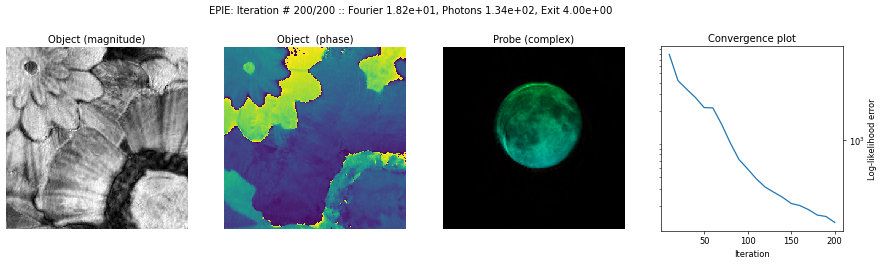


==== This reconstruction relied on the following work ==========================
The Ptypy framework:
    Enders B. and Thibault P., "A computational framework for ptychographic reconstructions" Proc. Royal Soc. A 472 (2016) 20160640, doi: 10.1098/rspa.2016.0640.
The ePIE reconstruction algorithm:
    Maiden A. and Rodenburg J., "An improved ptychographical phase retrieval algorithm for diffractive imaging" Ultramicroscopy 10 (2009) 1256, doi: 10.1016/j.ultramic.2009.05.012.


In [5]:
import ptypy
import ptypy.utils as u

p = u.Param()
p.verbose_level = "interactive"
p.io = u.Param()
p.io.rfile = None
p.io.autosave = u.Param(active=False)
p.io.autoplot = u.Param(active=False)
p.io.interaction = u.Param(active=False)
p.io.jupyter_autoplot = u.Param(active=True)

p.scans = u.Param()
p.scans.MF = u.Param()
p.scans.MF.name = "Full"
p.scans.MF.data= u.Param()
p.scans.MF.data.name = "MoonFlowerScan"
p.scans.MF.data.shape = 128
p.scans.MF.data.num_frames = 200
p.scans.MF.data.save = None
p.scans.MF.data.density = 0.2
p.scans.MF.data.photons = 1e8
p.scans.MF.data.psf = 0.

# Define reconstruction engines
p.engines = u.Param()

# ePIE engine
p.engines.engine00 = u.Param()
p.engines.engine00.name = "EPIE"
p.engines.engine00.numiter = 200
p.engines.engine00.numiter_contiguous = 10
p.engines.engine00.alpha = 1
p.engines.engine00.beta = 1
p.engines.engine00.object_norm_is_global = True

P = ptypy.core.Ptycho(p,level=5)

## Maximum Likelihood (ML) algorithm

...

<div class="alert alert-danger" markdown="1">
<strong>TODO</strong><br>Explain different object norm approaches.
</div>

<div class="alert alert-warning" markdown="1">
    <strong>Exersice</strong><br>Modify different ML engine parameters and observe their impact on the outcome of the reconstruction.
</div>

---

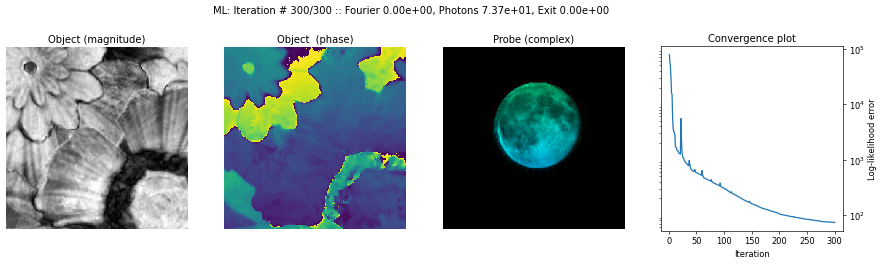


==== This reconstruction relied on the following work ==========================
The Ptypy framework:
    Enders B. and Thibault P., "A computational framework for ptychographic reconstructions" Proc. Royal Soc. A 472 (2016) 20160640, doi: 10.1098/rspa.2016.0640.
The maximum likelihood reconstruction algorithm:
    Thibault P. and Guizar-Sicairos M., "Maximum-likelihood refinement for coherent diffractive imaging" New Journal of Physics 14 (2012) 63004, doi: 10.1088/1367-2630/14/6/063004.


In [3]:
import ptypy
import ptypy.utils as u

p = u.Param()
p.verbose_level = "interactive"
p.io = u.Param()
p.io.rfile = None
p.io.autosave = u.Param(active=False)
p.io.autoplot = u.Param(active=False)
p.io.interaction = u.Param(active=False)
p.io.jupyter_autoplot = u.Param(active=True)

p.scans = u.Param()
p.scans.MF = u.Param()
p.scans.MF.name = "Full"
p.scans.MF.data= u.Param()
p.scans.MF.data.name = "MoonFlowerScan"
p.scans.MF.data.shape = 128
p.scans.MF.data.num_frames = 200
p.scans.MF.data.save = None
p.scans.MF.data.density = 0.2
p.scans.MF.data.photons = 1e8
p.scans.MF.data.psf = 0.

# Define reconstruction engines
p.engines = u.Param()

# Maximum Likelihood (ML) engine
p.engines.engine00 = u.Param()
p.engines.engine00.name = "ML"
p.engines.engine00.numiter = 300
p.engines.engine00.numiter_contiguous = 10
p.engines.engine00.reg_del2 = True 
p.engines.engine00.reg_del2_amplitude = 1.
p.engines.engine00.scale_precond = True

P = ptypy.core.Ptycho(p,level=5)

## GPU-accelerated engines

For running the GPU-accelerated equivalent of the engines described above, simple add this line at the top of the script

```python
ptypy.load_gpu_engines("cuda")
```

and add "_pycuda" to the engine name, for example

```python
# Difference Map (DM) engine
p.engines.engine00 = u.Param()
p.engines.engine00.name = "DM_pycuda"
```

<div class="alert alert-warning" markdown="1">
    <strong>Exersice</strong><br>Run the GPU-accelerated version of the above examples with different engines and observe the increase in reconstruction speed.
</div>

---

In [ ]:
import ptypy
import ptypy.utils as u

ptypy.load_gpu_engines("cuda")

# Copy the parameter tree here
# ...